In [1]:
%load_ext autoreload
%autoreload 2
from rekall import Interval, IntervalSet, IntervalSetMapping, Bounds3D
from rekall.predicates import *
from vgrid import VGridSpec, VideoMetadata, VideoBlockFormat, FlatFormat, SpatialType_Bbox, SpatialType_Keypoints, Metadata_Keypoints
from vgrid_jupyter import VGridWidget
import os, json
import pandas as pd
from const import *
from preprocessing import *
from helpers import *
from detection import *


### Load in video data.

In [2]:
# load in video metadata
video_collection_intel = [
    {'num_frames': 3053, 'height': 720, 'width': 406, 'fps': 29.84, 'filename': 'dally_sy.mp4', 'id': 0},
    {'num_frames': 1488, 'height': 720, 'width': 1280, 'fps': 30, 'filename': 'hip_emily.mp4', 'id': 1},
    {'num_frames': 2062, 'height': 720, 'width': 1280, 'fps': 30, 'filename': '7thsense_mayee.mp4', 'id': 2},
    {'num_frames': 1922, 'height': 1920, 'width': 1080, 'fps': 30, 'filename': 'wannabe1_emily.mp4', 'id': 3},
    {'num_frames': 1257, 'height': 1920, 'width': 1080, 'fps': 30, 'filename': 'wannabe2_emily.mp4', 'id': 4},
    {'num_frames': 2215, 'height': 720, 'width': 1280, 'fps': 30, 'filename': 'snapping_emily.mp4', 'id': 5},
    {'num_frames': 2957, 'height': 720, 'width': 1280, 'fps': 29.97, 'filename': 'dally_heidi.mp4', 'id': 6},
      {'num_frames': 1264, 'height': 1080, 'width': 1920, 'fps': 30.0, 'filename': 'hip_heidi.mp4', 'id': 7}
    ]
video_metadata_intel = [
    VideoMetadata(v["filename"], v["id"], v["fps"], int(v["num_frames"]), v["width"], v["height"])
    for v in video_collection_intel
]

# load in openpose output data
json_dir_dally = "C:/Users/heidi/Documents/seniorproject/data/dally_output/"
json_dir_hip = "C:/Users/heidi/Documents/seniorproject/data/hip_output/"
json_dir_7thsense = "C:/Users/heidi/Documents/seniorproject/data/7thsense_output/"
json_dir_wannabe1 = "C:/Users/heidi/Documents/seniorproject/data/wannabe1_output/"
json_dir_wannabe2 = "C:/Users/heidi/Documents/seniorproject/data/wannabe2_output/"
json_dir_snapping = "C:/Users/heidi/Documents/seniorproject/data/snapping_output/"
json_dir_dally2 = "C:/Users/heidi/Documents/seniorproject/data/dallyheidi_output"
json_dir_hip2 = "C:/Users/heidi/Documents/seniorproject/data/hipheidi_output"
json_dirs = [json_dir_dally, json_dir_hip, json_dir_7thsense, json_dir_wannabe1, json_dir_wannabe2, json_dir_snapping, json_dir_dally2, json_dir_hip2]
 



In [3]:
## LOAD ALL VIDEOS
frame_list_all_videos = load_op_data_all(json_dirs, video_metadata_intel)
dally2 = load_op_data(json_dir_dally2, video_metadata_intel[6], "rightmost_bbox")
frame_list_all_videos[6] = (dally2)

## LAZY LOADING: JUST ONE VIDEO
# test_id = 0
# frame_list = load_op_data(json_dirs[test_id], video_metadata_intel[test_id])
# frame_list_all_videos = [frame_list]

len(frame_list_all_videos)

8

### Annotate videos with open pose data, bounding boxes.

In [4]:
# create intervalset mapping w/ pose visualizing data
interval_sets = {}
interval_mapping_per_video = []
for test_id, frame_list in enumerate(frame_list_all_videos):
    vm = video_metadata_intel[test_id]
    bboxes = [get_op_bbox(frame) for frame in frame_list]
    curr_intervalset = IntervalSet([
                Interval(
                    Bounds3D(
                        t1 = frame_num / vm.fps,
                        t2 = (frame_num + 1) / vm.fps,
                        x1 = bboxes[frame_num][0],
                        x2 = bboxes[frame_num][1],
                        y1 = bboxes[frame_num][2],
                        y2 = bboxes[frame_num][3]
                    ),

                    {'spatial_type': SpatialType_Keypoints(),
                        'metadata': {
                            # This function can also parse faces and hands
                            'pose': Metadata_Keypoints(pose, BODY25_EDGES)
                        }
                    }

                )
                for frame_num, pose in enumerate(frame_list)
            ])
    interval_sets[test_id] = curr_intervalset
    interval_mapping_per_video.append(IntervalSetMapping(dict({test_id:interval_sets[test_id]})))

interval_mapping_all_videos = IntervalSetMapping(interval_sets)
len(interval_mapping_all_videos)

8

### Visualize OP data


In [5]:
test_id = 1
interval_mapping = interval_mapping_per_video[test_id]

# visualize
def visualize_helper(video_metadata_intel, interval_mappings): #interval mappings = [('intervalmapname', mapping), etc.]
    
    vgrid_spec = VGridSpec(
        video_meta = video_metadata_intel,
        vis_format = VideoBlockFormat(imaps = interval_mappings),
        video_endpoint = 'http://localhost:8000'
        
    )
    return VGridWidget(vgrid_spec = vgrid_spec.to_json_compressed())

        
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping)])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\xaemIn\xa6\xf7*B]\'\x848\x1f\xfc\n\x86…

# Feedback Exploration

## Sync Audio

In [4]:
from alignment_by_row_channels import align
# video1 = "hip_heidi.mp4"
# video2 = "hip_heidi.mp4"
video1 = "short.mp4"
video2 = video1
# directory = "C:/Users/heidi/Documents/seniorproject/data/"
directory = "../../data/"
# C:/Users/heidi/Documents/seniorproject/data/hip_emily

align(video1, video2, directory)

Running program
Audio extracted
Audio read
Horiz bins made
Vert bins made
Finished processing first file
Audio extracted
Audio read
Horiz bins made
Vert bins made
Finished processing second file
512
512
84131


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

KeyboardInterrupt: 

# Writing Queries

###  Sanity check frame on source video

In [7]:
# RUN SIMILARITY TESTS: SANITY CHECK ON SAME VIDEO
test_id = 1
interval_mapping = interval_mapping_per_video[test_id]

# single frame
# sample_frame = get_coords_dict(interval_mapping[test_id].get_intervals()[1090])
# simtest = interval_mapping.filter(lambda interval: joint_similarity(interval, sample_frame) >= .999)
# visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
#                                           ('simtest', simtest)])

# sequence of frames
frame_range = range(1090, 1120, 5)
# frame_range = range(900, 930, 5) - failed case on second video!
sample_frames = [get_coords_dict(interval_mapping[test_id].get_intervals()[frame_num]) for frame_num in frame_range]
simseqtest = search_pose_sequence(interval_mapping, sample_frames, seconds_between=.2, similarity_threshold=.99) # range is over 30 frames = 1 sec. / 5
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                          ('simseqtest', simseqtest)])


VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\xaemIn\xa6\xf7*B]\'\x848\x1f\xfc\n\x86…

### Test with poses we constructed in our pose editor app

In [98]:
test_id = 1
interval_mapping = interval_mapping_per_video[test_id]

# load in opframes from pose editor.
editor_jsondirs = ["C:/Users/heidi/Documents/seniorproject/posequery/hipseq/{}.json".format(i) for i in range(1,8)]
editor_frames = [load_editor_frame(jd) for jd in editor_jsondirs]


# sequence of frames
sample_frames = [editor_frames[0], editor_frames[5], editor_frames[6]]
simseqtest = search_pose_sequence(interval_mapping, sample_frames, seconds_between=.3, similarity_threshold=.98) # range is over 30 frames = 1 sec. / 5
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                          ('simseqtest', simseqtest)])


VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\xaemIn\xa6\xf7*B]\'\x848\x1f\xfc\n\x86…

In [103]:
# RUN SIMILARITY TEST: DIFFERENT VIDEO, SAME DANCE
test_id = 7
interval_mapping = interval_mapping_per_video[test_id]

# single frame
# simtest = interval_mapping.filter(lambda interval: joint_similarity(interval, sample_frame) >= .95)
# visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
#                                           ('simtest', simtest)])

# sequence of frames
simseqtest = search_pose_sequence(interval_mapping, sample_frames, seconds_between=.2, similarity_threshold=.97) 
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                          ('simseqtest', simseqtest)])


# Some notes: at simthresh .9, there were lots of false positives. at .8, there were soooo many.

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xcb\xael\xddq\x9d\xf9*\x02\xdb\x841\xef\x9…

In [107]:
# RUN SIMILARITY TEST: DIFFERENT VIDEO, SAME DANCE
test_id = 7
interval_mapping = interval_mapping_per_video[test_id]

sample_frames = [editor_frames[0], editor_frames[5], editor_frames[6]]
simseqtest = search_pose_sequence(interval_mapping, sample_frames, seconds_between=.3, similarity_threshold=.97) # range is over 30 frames = 1 sec. / 5
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                          ('simseqtest', simseqtest)])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xcb\xael\xddq\x9d\xf9*\x02\xdb\x841\xef\x9…

### Previous iteration: searching for sequences by passing in query lambdas

In [114]:
## The first rendition of sequences searching : passing in poses as lambdas (queries)
def search_pose_sequence(interval_mapping, poses):
    """
    Search for any interval with a sequence of poses. 
    Args:
        poses: list of lambda functions that return true if query condition satisfied (i.e., is the right pose)
    Returns:
        fully coalesced and joined intervals that contain the sequence of poses.
    Future implementation add-ons: 
        1) passing in poses as frames instead of lambdas, which would involve updating for loop .filter() statement to take in a function that returns true if poses are % similar
        2) specifying epsilons / time leeway between each pose

    """
    # get segments for first pose
    frames = interval_mapping.filter(detected).filter(poses[0])
    output= frames.coalesce(('t1', 't2'),
        bounds_merge_op = Bounds3D.span, 
        payload_merge_op = concat_frames,
        epsilon=.1)
    # for each remaining pose, coalesce and join segments with running output
    for pose in poses[1:]:
        frames = interval_mapping.filter(detected)
        frames = frames.filter(pose)
        segments = frames.coalesce(('t1', 't2'),
            bounds_merge_op = Bounds3D.span, 
            payload_merge_op = concat_frames,
            epsilon=.1)
        output = output.join(segments,
            predicate = or_pred(overlaps(), before(max_dist = 1)),
            merge_op = lambda i1, i2: Interval(i1['bounds'].span(i2['bounds'])),
            window = 1)
    return output

def run_test():
    test1 = search_pose_sequence(interval_mapping, [hands_up_query]) #y, chest_hits_query, hands_below_waist
    test2 = search_pose_sequence(interval_mapping, [chest_hits_query])
    test3 = search_pose_sequence(interval_mapping, [hands_below_waist_query])
    finaltest = search_pose_sequence(interval_mapping, [hands_up_query, chest_hits_query, hands_below_waist_query])
    return visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                           ('t1', test1), ('t2', test2), ('t3', test3), ('ft', finaltest)])
run_test()

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\x8emG\x8e\x9e\xfb*\r]\x0b\x8d8\x1f\xfc…

### Easy Queries: Splits, Drop from "Dally"

In [112]:
test_id = 0
interval_mapping = interval_mapping_per_video[test_id]
def splits_query(interval):
    leftangle = angle_from_x(interval, "LHip", "LAnkle")
    rightangle = angle_from_x(interval, "RHip", "RAnkle")
    
    if (leftangle != -1 and rightangle != -1):
        return leftangle < 30 and rightangle > 150
    return False

splits = interval_mapping.filter(splits_query)
splits_segments = splits.coalesce(('t1', 't2'),bounds_merge_op = Bounds3D.span)

visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                       ('splits', splits_segments)])



VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\x927\xc7m\xed\xf9*\x0e^3\x1cy>\xcc+L\x…

In [109]:
test_id = 0
interval_mapping = interval_mapping_per_video[test_id]

def sdrop_query(interval): #:))) this really is the most succint name for this move tho
    lthigh_angle = angle_from_x(interval, "LHip", "LKnee")
    rthigh_angle = angle_from_x(interval, "RHip", "RKnee")
    lcalf_angle = angle_from_x(interval, "LKnee", "LAnkle")
    rcalf_angle = angle_from_x(interval, "RKnee", "RAnkle")
    
    
    if (lthigh_angle != -1 and rthigh_angle != -1 and lcalf_angle != -1 and rcalf_angle != -1):
        return lthigh_angle < 30 and rthigh_angle > 150 and lcalf_angle > 150 and rcalf_angle < 30
    return False

sdrop = interval_mapping.filter(sdrop_query)
sdrop_segments = sdrop.coalesce(('t1', 't2'), bounds_merge_op = Bounds3D.span, epsilon=2)

visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                       ('sdrop', sdrop_segments)
                                       ])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\x927\xc7m\xed\xf9*\x0e^3\x1cy>\xcc+L\x…

### Medium Query: Chorus move from "HIP"

In [111]:
# Pain points: false positives with leg angles, lots of "heads knees toes" esque queries, what I have isn't super specific
# for example, this query was developed on test_id 1 and works, but yields a false positive in vid 2
test_id = 1
interval_mapping = interval_mapping_per_video[test_id]
### MOVE SPECIFIC QUERIES
# HIP chorus move
def hands_below_waist_query(interval):
    #hands_above_head = is_below('REye', 'RWrist') and is_below('REye', 'LWrist')
    hands_below_waist = is_below(interval, 'RWrist','RHip') and is_below(interval, 'LWrist', 'RHip')
    knees_spread = is_left(interval, 'LKnee', 'LHip') and is_right(interval, 'RKnee', 'RHip')
    knees_bent_out = smaller_angle_from_x(interval,'RKnee', 'RAnkle',  'RHip', 'RKnee') \
                       and smaller_angle_from_x(interval, 'LHip', 'LKnee', 'LKnee', 'LAnkle')
    return hands_below_waist and knees_spread and knees_bent_out
    
def chest_hits_query(interval):
    return is_close_to(interval, 'RWrist', 'RShoulder', .15) and is_close_to(interval, 'LWrist', 'LShoulder', .15)

def hands_up_query(interval):
    return is_below(interval, 'REye', 'RWrist') and is_below(interval, 'REye', 'LWrist')
#     rwrist = get_coords(interval, PART_TO_INDEX['RWrist'])
#     lwrist = get_coords(interval, PART_TO_INDEX['LWrist'])
#     eyes = get_coords(interval, PART_TO_INDEX['REye'])
#     return not_zero(rwrist) and not_zero(lwrist) and is_below rwrist[1] < eyes[1] and lwrist[1] < eyes[1]

# Get frames
hands_below_waist = interval_mapping.filter(hands_below_waist_query)
chest_hits = interval_mapping.filter(chest_hits_query)
hands_up = interval_mapping.filter(lambda interval: is_below(interval, 'REye', 'RWrist') and is_below(interval, 'REye', 'LWrist'))


# Add coalescing for adjacent frame detected, and then join sequence of handsup-chest-hit-belowwaist


# Coalesce
hands_below_waist_segments = hands_below_waist.coalesce(
    ('t1', 't2'),
    bounds_merge_op = Bounds3D.span, 
     payload_merge_op = concat_frames,
    epsilon=.1)

chest_hits_segments = chest_hits.coalesce(
    ('t1', 't2'),
    bounds_merge_op = Bounds3D.span, 
     payload_merge_op = concat_frames,
    epsilon=.1)

hands_up_segments = hands_up.coalesce(
    ('t1', 't2'),
    bounds_merge_op = Bounds3D.span, 
     payload_merge_op = concat_frames,
    epsilon=.1)


#Join
hip_hook = hands_up_segments.join(
    chest_hits_segments,
    predicate = or_pred(overlaps(), before(max_dist = 1)),
    merge_op = lambda i1, i2: Interval(i1['bounds'].span(i2['bounds'])),
    window = 1
)

hip_hook = hip_hook.join(
    hands_below_waist_segments,
    predicate = or_pred(overlaps(), before(max_dist = 1)),
    merge_op = lambda i1, i2: Interval(i1['bounds'].span(i2['bounds'])),
    window = 1
)

visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                       ('hiphook', hip_hook),
                                        ('handsup', hands_up_segments), ('chesthits', chest_hits_segments), 
                                        ('handsknees', hands_below_waist_segments)])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\xaemIn\xa6\xf7*B]\'\x848\x1f\xfc\n\x86…

In [110]:
### Medium Query: 
# Pain points: crossing limbs, specifying that the relative knee position was around halfway up the opposite thigh
# repeated snaps - specifying exactly 2, at that timing
# pathway!!

# false positives in vid 0, 2

test_id = 5
interval_mapping = interval_mapping_per_video[test_id]

def arms_cross(interval):
    lshoulder = get_coords(interval, PART_TO_INDEX['LShoulder'])
    rshoulder = get_coords(interval, PART_TO_INDEX['RShoulder'])
    lwrist = get_coords(interval, PART_TO_INDEX['LWrist'])
    rwrist = get_coords(interval, PART_TO_INDEX['RWrist'])
    if not_zero(lshoulder) and not_zero(rshoulder) and not_zero(lwrist) and not_zero(rwrist):
        larm = [lshoulder, lwrist]
        rarm = [rshoulder, rwrist]
        return intersects(larm, rarm)
    return False

def knee_up(interval):
    lknee = get_coords(interval, PART_TO_INDEX['LKnee'])
    rknee = get_coords(interval, PART_TO_INDEX['RKnee'])
    midhip = get_coords(interval, PART_TO_INDEX['MidHip'])
    if not_zero(lknee) and not_zero(rknee):
        return lknee[1] > rknee[1] + .5 * abs(midhip[1] - rknee[1])
    return False
    
def snapping_query(interval):
    return arms_cross(interval) and knee_up(interval)
   

snapping = interval_mapping.filter(snapping_query)
snapping_segments = snapping.coalesce(('t1', 't2'), bounds_merge_op = Bounds3D.span, epsilon=2)
visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
                                       ('snapping', snapping)])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xfd\xdb\xael\xcdq\xa5\t\xbeJ\x82\xd7D\xc1\xcf\…

# Evaluation

### Hand annotate video for this move.

In [39]:
#HAND ANNOTATE
vgrid_spec = VGridSpec(
        video_meta = video_metadata_intel,
        vis_format = VideoBlockFormat(imaps = [
            ('bboxes', interval_mapping)
        ]),
        video_endpoint = 'http://localhost:8002'
    )
widget =  VGridWidget(vgrid_spec = vgrid_spec.to_json_compressed()) 


In [40]:
widget

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xec\xbd\xdb\x8e.In\xa5\xf9*B^\'\x04;\x1f\xe6\x15\x…

In [42]:
arm_twirlies = widget.label_state

In [48]:
arm_twirlies['block_labels']['0']['new_intervals']

[{'bounds': {'t1': 15.986003,
   't2': 19.00883418779877,
   'bbox': {'x1': 0, 'x2': 1, 'y1': 0, 'y2': 1}},
  'data': {'spatial_type': {'args': {}}, 'metadata': {}}}]

### Output widget data

In [57]:
# widget_output = hands_up[0].get_intervals()[0]['payload']
output_widget = True
# widget_file = '7th_sense_mayee_annotated.json'\
widget_file = 'hip_emily_annotated.json'
if output_widget:
    with open(widget_file, 'w') as f:
        json.dump(widget.label_state, f)
        

widget.label_state

In [101]:
# # TIME TO START EVALUATING YO
# widget_file = '7th_sense_mayee_annotated-Copy1.json'
# with open(widget_file, 'w') as f:
#     widget_labels = json.load(f)

UnsupportedOperation: not readable

## Evaluate results.

In [67]:
import math
import numpy as np 
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score #inputs: y_truth, y_predict

# def iou(y_truth, y_predict):
#     insxn = sum(np.logical_and(y_truth, y_predict))
#     union = sum(np.logical_or(y_truth, y_predict))
#     return insxn / union



def get_action_segments(interval_list, vm, segment_length = 1):
    action_segments = np.zeros(math.ceil((vm.num_frames / vm.fps) / segment_length)) # zeros array for # of actaion segs
    for interval in interval_list:
        bounds = interval['bounds']
        t1 = bounds['t1'] 
        t2 = bounds['t2'] 
        while (t1 <= t2):
            segment_idx = math.floor(t1 / segment_length)
            action_segments[segment_idx] = 1 #mark as 1 for an event!
            t1 += segment_length
    return action_segments

def pad_margin(y, margin):
    # implemented rn just for ones
    y_copy = y
    for i in range(len(y)):
        if i == 1:
            if i!= 0:
                y_copy[i-1] = 1
            if i != len(y) - 1:
                y_copy[i+1] = 1
    return y_copy

def evaluate(intervals_predict, intervals_truth, vm, segment_length, margin=0):
#     plt.plot(range(len(y_predict)))
    y_predict = get_action_segments(intervals_predict, vm, segment_length)
    y_truth = get_action_segments(intervals_truth, vm, segment_length)
    
    if margin > 0:
        y_predict = pad_margin(y_predict, margin)
        y_truth = pad_margin(y_truth,  margin)
    print("Evaluating with segment length = {}s".format(segment_length))
    print("Recall: {}".format(recall_score(y_truth, y_predict)))
    print("Precision: {}".format(precision_score(y_truth, y_predict)))
    print("F1 score: {}".format(f1_score(y_truth, y_predict)))
    print("IOU: {}".format(iou(y_truth, y_predict)))
    print("Relative Score: {}".format(np.dot(y_truth, y_predict)))
    print("Accuracy: {}".format(accuracy_score(y_truth, y_predict)))
    print()
    
interval_list = widget.label_state['block_labels']['0']['new_intervals']
vm = video_metadata_intel[test_id]
segment_length = .1 # in terms of seconds / times instead of # frames, since time is a constant measure across vids and is more intuitive

rekall_labels = hands_up[test_id].get_intervals()
hand_labels = interval_list

# for i in range (1, 15):
for i in range(1, 2):
    segment_length = i / 10.0
    evaluate(rekall_labels, hand_labels, vm, segment_length, 1)

Evaluating with segment length = 0.1s
Recall: 0.9032258064516129
Precision: 0.6086956521739131
F1 score: 0.7272727272727272
IOU: 0.5714285714285714
Relative Score: 28.0
Accuracy: 0.9576612903225806



### Intersection over Union

In [86]:
def overlap(bound1, bound2):
    return not (bound1['t2'] < bound2['t1'] or bound2['t2'] < bound1['t1'])


def iou(bound1, bound2):
    insxn = min(bound1['t2'], bound2['t2']) - max(bound1['t1'], bound2['t1']) 
    union = max(bound1['t2'], bound2['t2']) - min(bound1['t1'], bound2['t1']) 
    return insxn/union
    
def iou_avg(intervals_predict, intervals_truth):
    # for interval/annotated action in ground truth, calculate iou over that time period
    total = 0
    for it in intervals_truth:
        for ip in intervals_predict:
            if ip['bounds']['t1'] > it['bounds']['t2']: # interval starts after current ground truth interval; done searching
                break
            if overlap(it['bounds'], ip['bounds']):

                total += iou(it['bounds'], ip['bounds'])
    return total / len(intervals_truth)


rekall_labels = hands_up[test_id].get_intervals()
hand_labels = interval_list

print(iou_avg(rekall_labels, hand_labels))

0.6338289919749152


In [ ]:
# gest pose dictionary from interval_mapping
test_frame = interval_mapping[test_id].get_intervals()[1125]['payload']['metadata']['pose'].to_json()['args']['keypoints']

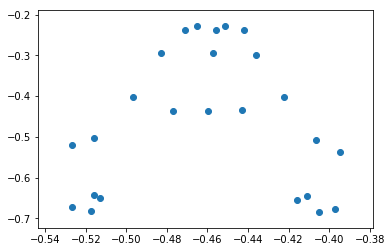

In [130]:
import matplotlib.pyplot as plt
# for heck in editor_frames[1:3]:
#     print(heck)
heck = editor_frames[6]
plt.scatter([-heck[t][0] for t in heck], [-heck[t][1] for t in heck])

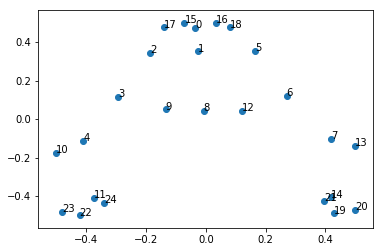

In [89]:
import matplotlib.pyplot as plt
heck = editor_frames[6]
heck = coords_in_bbox(heck, get_op_bbox(heck))
xheck, yheck = [heck[t][0] for t in heck], [-heck[t][1] for t in heck]
plt.scatter(xheck, yheck)
for i in range(0, 25):
    plt.annotate(str(i),(xheck[i],yheck[i]))

plt.show()

ref = get_coords_dict(interval_mapping[test_id].get_intervals()[1118])
ref = coords_in_bbox(ref, get_op_bbox(ref))

# xheck, yheck = [-heck[t][0] for t in heck], [-heck[t][1] for t in heck]
# plt.scatter(xheck, yheck)
# plt.annotate('4',(xheck[4],yheck[4]))

xref, yref = [ref[t][0] for t in ref], [-ref[t][1] for t in ref]
plt.scatter(xref, yref)
# for i in range(0, 25):
i = 20
plt.annotate(str(i),(xref[i],yref[i]))
# plt.scatter(xheck, yheck)
plt.show()


In [ ]:

# single frame
# sample_frame1 = editor_frames[0]
# simtest1 = interval_mapping.filter(
#     lambda interval: joint_similarity(interval, sample_frame1) >= .98
# )

# sample_frame2 = editor_frames[5]
# simtest2 = interval_mapping.filter(
#     lambda interval: joint_similarity(interval, sample_frame2) >= .98
# )

# sample_frame3 = editor_frames[6]
# simtest3 = interval_mapping.filter(
#     lambda interval: joint_similarity(interval, sample_frame3) >= .97
# )

# visualize_helper(video_metadata_intel, [('bboxes',interval_mapping),
#                                           ('simtest1', simtest1),('simtest2', simtest2),('simtest3', simtest3)])